In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from numpy import nan
import data_describe as dd

The dataset in this example is on pump sensors that have had 7 pump failures in the last year.

In [49]:
df = pd.read_csv('Desktop/data-describe/sensor.csv', index_col=0)

We can see that there are 51 sensors, a timestamp for each reading, and machine status.

In [3]:
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0  2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1  2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2  2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3  2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4  2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  \
0   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
1   76.45975   13.41146   16.13136   15.56713  ...   41.92708  39.641200   
2   73.54598   13.32465   16.03733   15.61777  ...   41.66666  39.351852   
3   76.98898   13.31742   16.24711   15.69734  ...   40.88541  39.062500   
4   76.58897   13.35359   16.21094   15.69734  ...   41.40625  38.773150   

   sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  \
0   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
1   65.68287   50.92593  38.194440   157.9861   67.70834   243.0556   
2   65.39352   51.21528  38.194443   155.9606   67.12963   241.3194   
3   64.81481   51.21528  38.194440   155.9606   66.84028   240.4514   
4   65.10416   51.79398  38.773150   158.2755   66.55093   242.1875   

   sensor_51  machine_status  
0   201.3889          NORMAL  
1   201.3889          NORMAL  
2   203.7037          NORMAL  
3   203.1250          NORMAL  
4   201.3889          NORMAL  

[5 rows x 54 columns]

The feature "machine_status" is categorical, and it describes if a pump is broken, recovering, or normal at a given time. This is valuable information that could potentially explain why anomolous behaviors are occurring in the sensor readings.
In order to use this information in an exploratory data analysis, we will numerically encode the three machine statuses below.

In [4]:
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [50]:
machine_status = {'NORMAL':0, 'BROKEN':1, 'RECOVERING':2}
df['machine_status_enc'] = df['machine_status'].map(lambda x: machine_status[x])

In [51]:
df['machine_status_enc'].value_counts()

0    205836
2     14477
1         7
Name: machine_status_enc, dtype: int64

Where the darkest red squares are, we can see that machine status has a high correlation with sensor_00, sensor_02, and a few more.

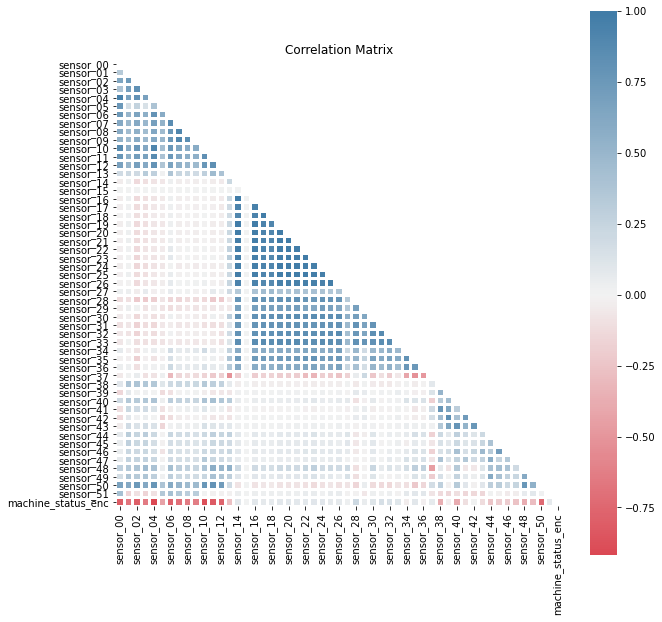

In [7]:
dd.correlation_matrix(df)

We can view the summary statistics to gain an overview. The mean and standard deviation are going to be particularly helpful in discovering outliers and anomalies. 

In [8]:
df.describe()

sensor_00      sensor_01      sensor_02      sensor_03  \
count  210112.000000  219951.000000  220301.000000  220301.000000   
mean        2.372221      47.591611      50.867392      43.752481   
std         0.412227       3.296666       3.666820       2.418887   
min         0.000000       0.000000      33.159720      31.640620   
25%         2.438831      46.310760      50.390620      42.838539   
50%         2.456539      48.133678      51.649300      44.227428   
75%         2.499826      49.479160      52.777770      45.312500   
max         2.549016      56.727430      56.032990      48.220490   

           sensor_04      sensor_05      sensor_06      sensor_07  \
count  220301.000000  220301.000000  215522.000000  214869.000000   
mean      590.673936      73.396414      13.501537      15.843152   
std       144.023912      17.298247       2.163736       2.201155   
min         2.798032       0.000000       0.014468       0.000000   
25%       626.620400      69.976260      13.346350      15.907120   
50%       632.638916      75.576790      13.642940      16.167530   
75%       637.615723      80.912150      14.539930      16.427950   
max       800.000000      99.999880      22.251160      23.596640   

           sensor_08      sensor_09  ...      sensor_43      sensor_44  \
count  215213.000000  215725.000000  ...  220293.000000  220293.000000   
mean       15.200721      14.799210  ...      43.879591      42.656877   
std         2.037390       2.091963  ...      11.044404      11.576355   
min         0.028935       0.000000  ...      24.479166      25.752316   
25%        15.183740      15.053530  ...      39.583330      36.747684   
50%        15.494790      15.082470  ...      42.968750      40.509260   
75%        15.697340      15.118630  ...      46.614580      45.138890   
max        24.348960      25.000000  ...     408.593700    1000.000000   

           sensor_45      sensor_46      sensor_47      sensor_48  \
count  220293.000000  220293.000000  220293.000000  220293.000000   
mean       43.094984      48.018585      44.340903     150.889044   
std        12.837520      15.641284      10.442437      82.244957   
min        26.331018      26.331018      27.199070      26.331018   
25%        36.747684      40.509258      39.062500      83.912030   
50%        40.219910      44.849540      42.534720     138.020800   
75%        44.849540      51.215280      46.585650     208.333300   
max       320.312500     370.370400     303.530100     561.632000   

           sensor_49      sensor_50      sensor_51  machine_status_enc  
count  220293.000000  143303.000000  204937.000000        220320.00000  
mean       57.119968     183.049260     202.699667             0.13145  
std        19.143598      65.258650     109.588607             0.49557  
min        26.620370      27.488426      27.777779             0.00000  
25%        47.743060     167.534700     179.108800             0.00000  
50%        52.662040     193.865700     197.338000             0.00000  
75%        60.763890     219.907400     216.724500             0.00000  
max       464.409700    1000.000000    1000.000000             2.00000  

[8 rows x 53 columns]

Look closely at the sensors which are correlated with machine_status. When they are appearing dark blue/black, their value is more than 2 standard deviations from the mean, which is associated with anomolous behvaior. This is happening right about the same time that 'machine_status' is yellow or 'RECOVERING'.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:770: RuntimeWarning:

invalid value encountered in true_divide

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:711: RuntimeWarning:

Degrees of freedom <= 0 for slice.



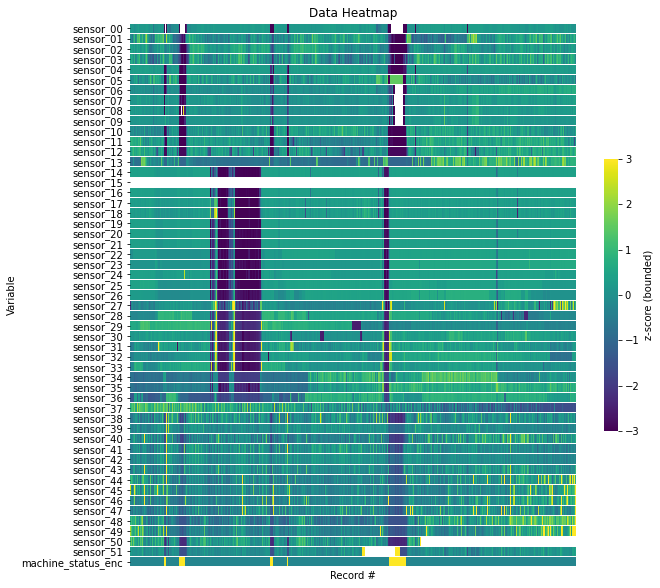

Heatmap Widget showing standardized values.

In [9]:
dd.data_heatmap(df)

Before working with the data, we want to check for any null values and deal with them right away.

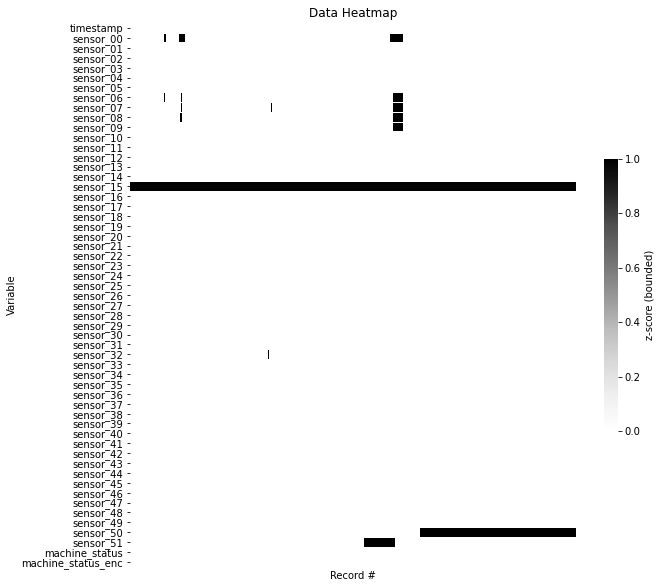

Heatmap Widget showing missing values.

In [10]:
dd.data_heatmap(df, missing=True)

Since sensor_15 is all null values, we will drop it from the dataframe. Let's see which other columns have null values.

In [52]:
df.drop(columns=['sensor_15'], inplace=True)

In [12]:
df.isnull().sum()

timestamp                 0
sensor_00             10208
sensor_01               369
sensor_02                19
sensor_03                19
sensor_04                19
sensor_05                19
sensor_06              4798
sensor_07              5451
sensor_08              5107
sensor_09              4595
sensor_10                19
sensor_11                19
sensor_12                19
sensor_13                19
sensor_14                21
sensor_16                31
sensor_17                46
sensor_18                46
sensor_19                16
sensor_20                16
sensor_21                16
sensor_22                41
sensor_23                16
sensor_24                16
sensor_25                36
sensor_26                20
sensor_27                16
sensor_28                16
sensor_29                72
sensor_30               261
sensor_31                16
sensor_32                68
sensor_33                16
sensor_34                16
sensor_35           

Since we are working with time series data, imputation can be tricky. If the mean is used, that can shrink the confidence interval in a forecasting, and throw off the local trends and seasonality. For now, we will propogate the last valid observation forward to fill the null.

In [53]:
df.fillna(method='ffill', inplace=True)

In [54]:
df.isnull().sum()

timestamp             0
sensor_00             0
sensor_01             0
sensor_02             0
sensor_03             0
sensor_04             0
sensor_05             0
sensor_06             0
sensor_07             0
sensor_08             0
sensor_09             0
sensor_10             0
sensor_11             0
sensor_12             0
sensor_13             0
sensor_14             0
sensor_16             0
sensor_17             0
sensor_18             0
sensor_19             0
sensor_20             0
sensor_21             0
sensor_22             0
sensor_23             0
sensor_24             0
sensor_25             0
sensor_26             0
sensor_27             0
sensor_28             0
sensor_29             0
sensor_30             0
sensor_31             0
sensor_32             0
sensor_33             0
sensor_34             0
sensor_35             0
sensor_36             0
sensor_37             0
sensor_38             0
sensor_39             0
sensor_40             0
sensor_41       

In [55]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

Plot time series for each sensor with BROKEN state marked with X in red color.

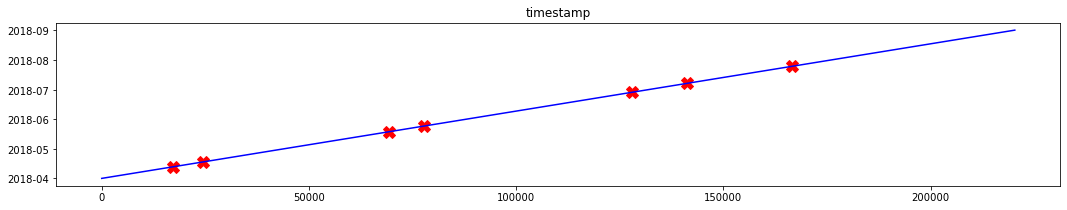

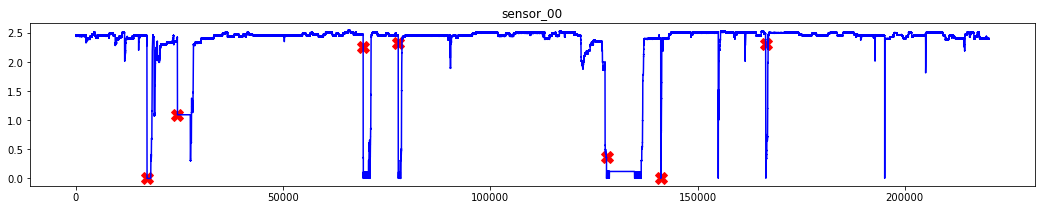

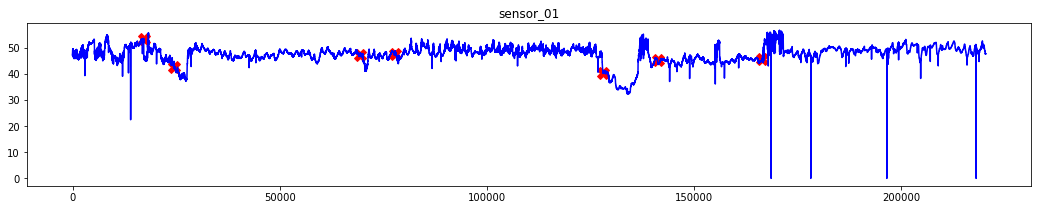

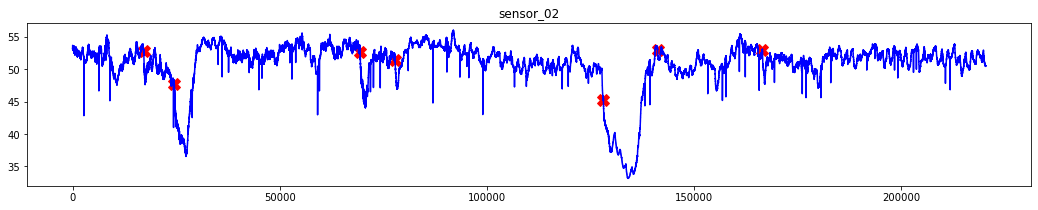

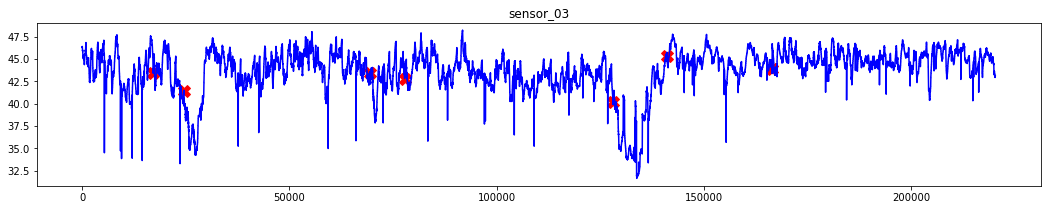

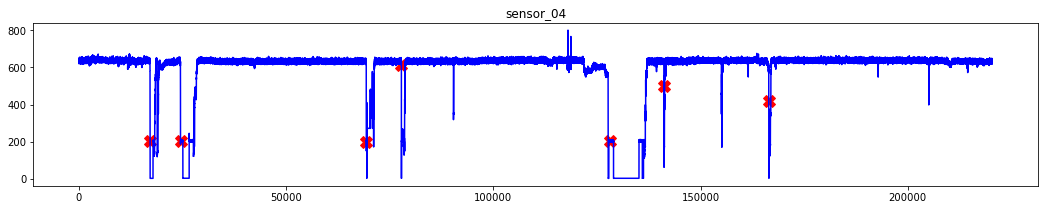

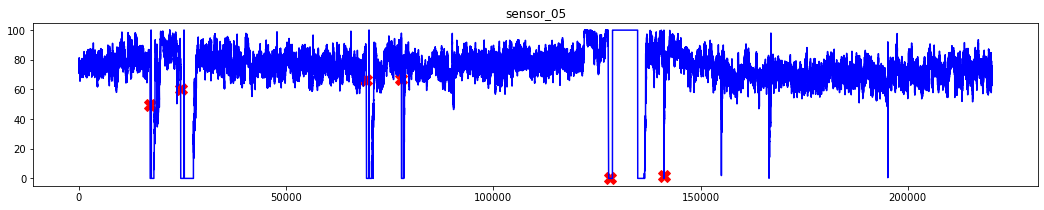

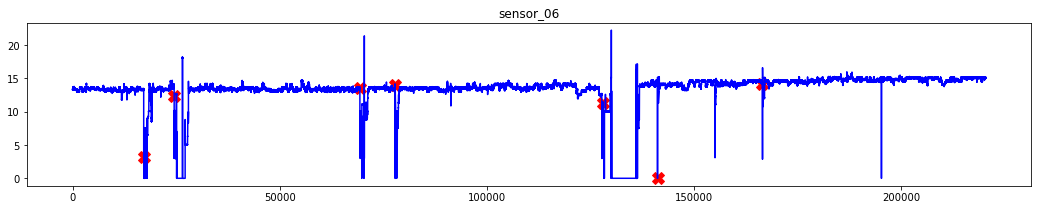

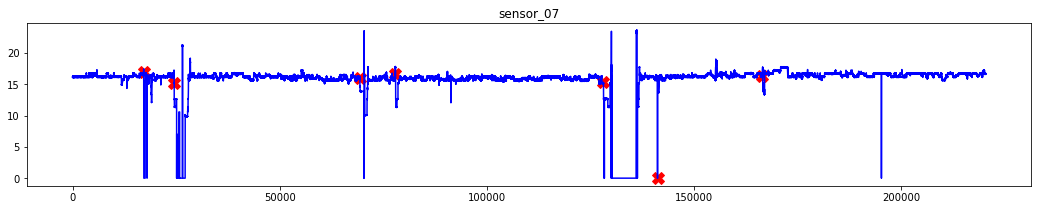

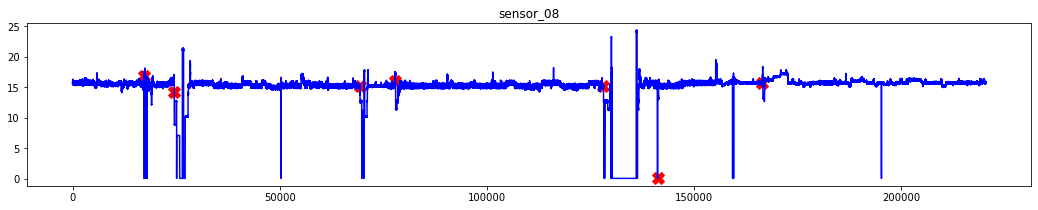

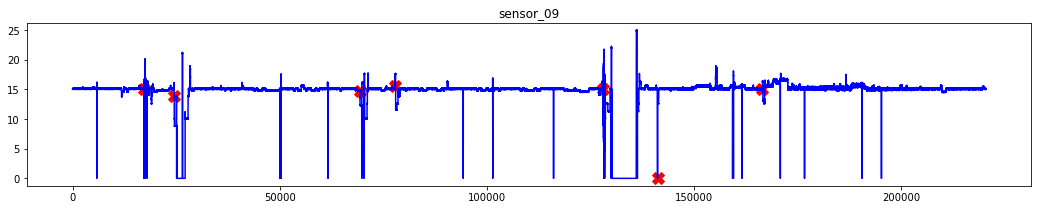

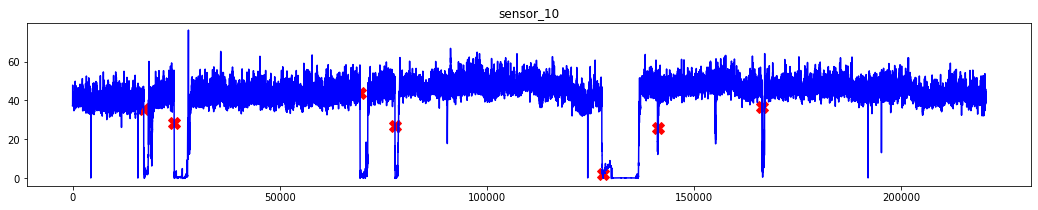

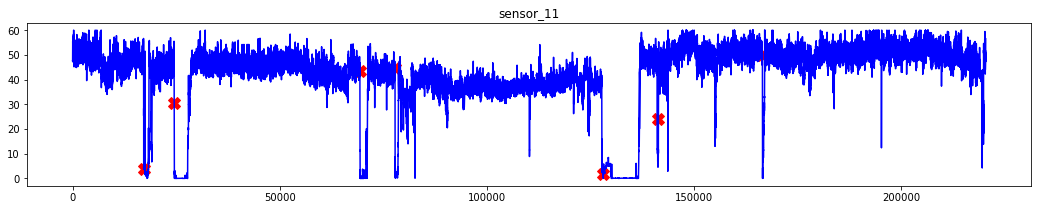

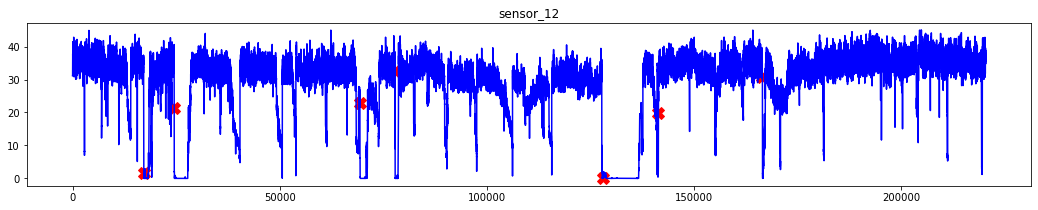

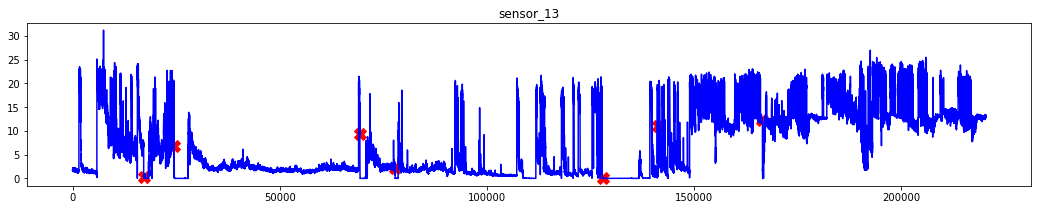

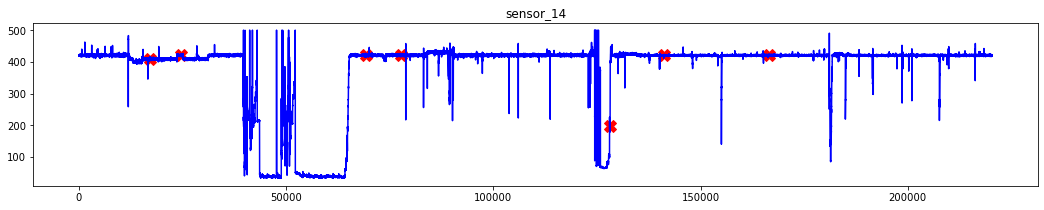

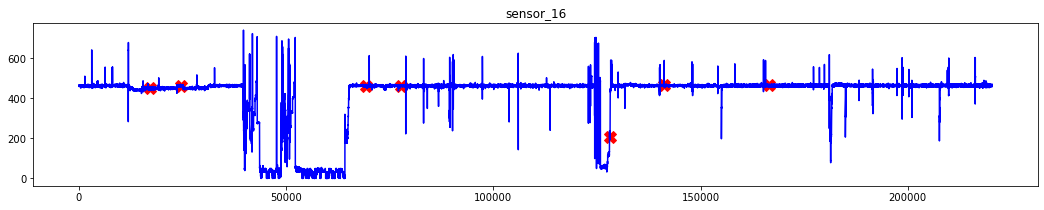

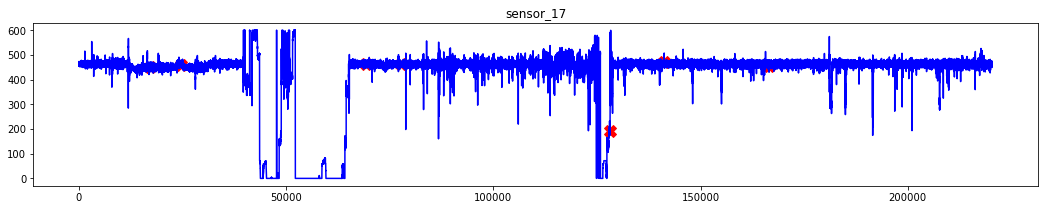

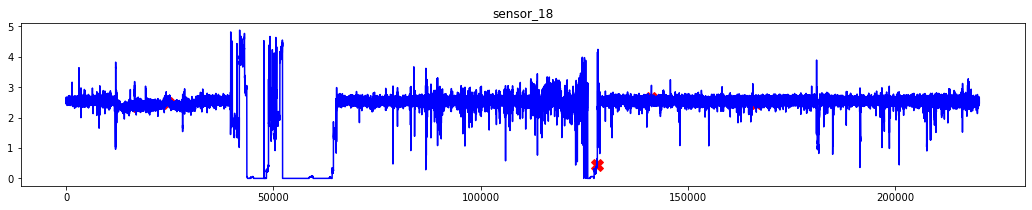

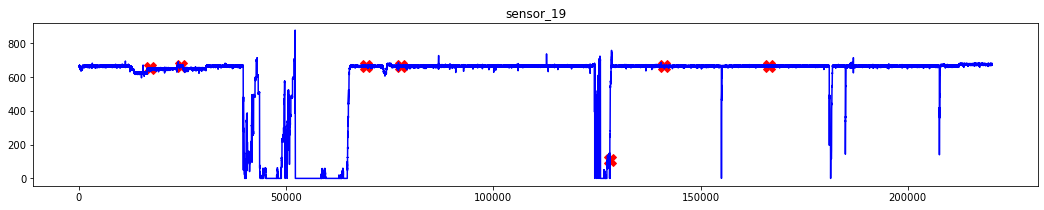

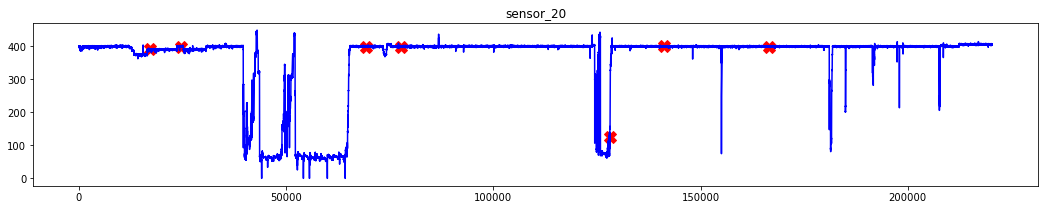

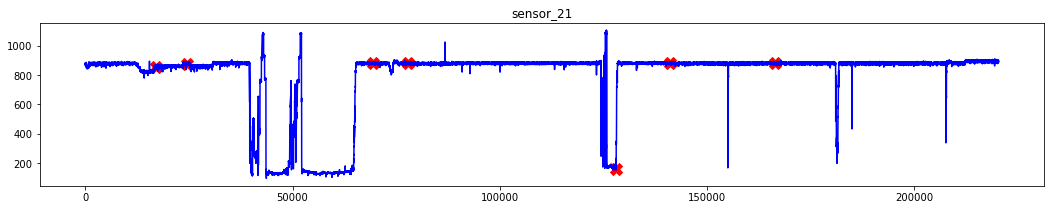

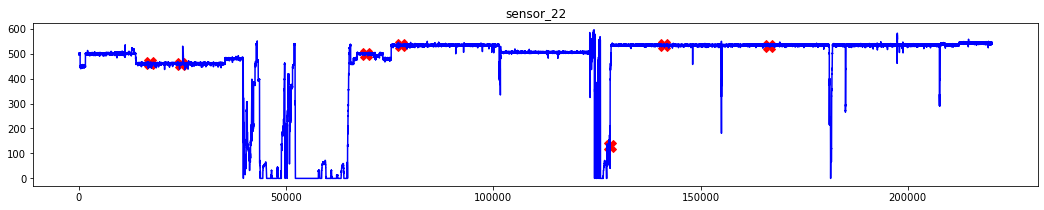

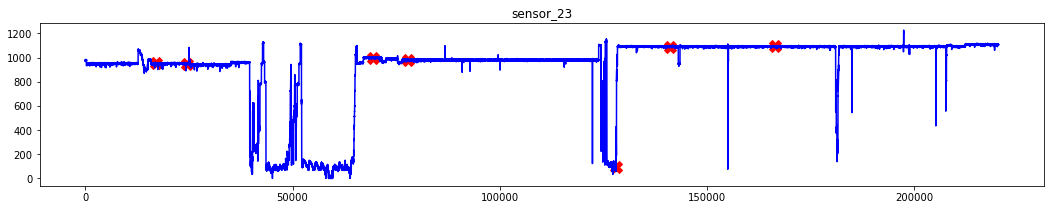

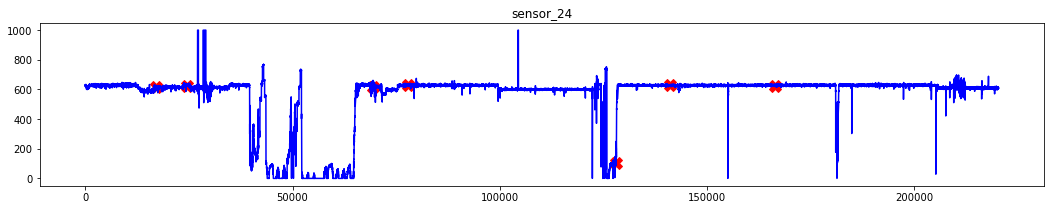

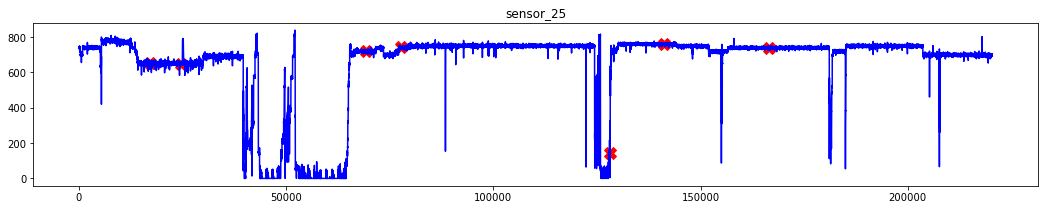

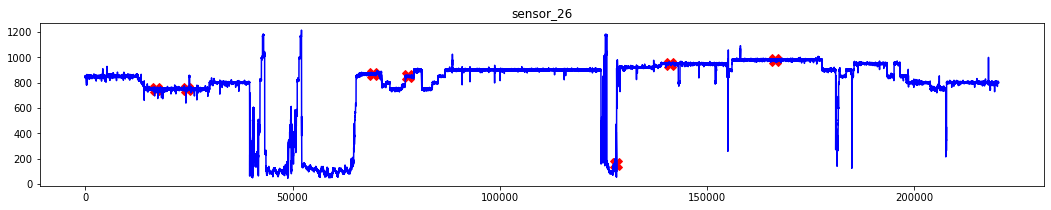

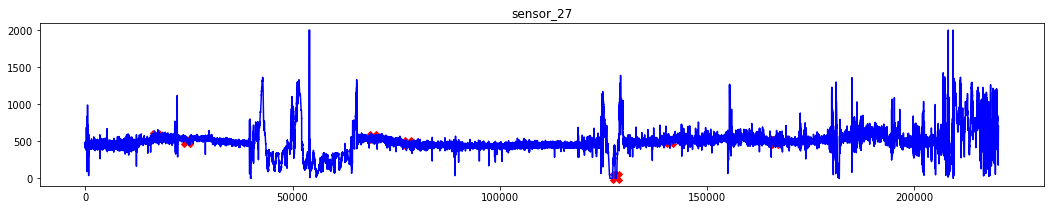

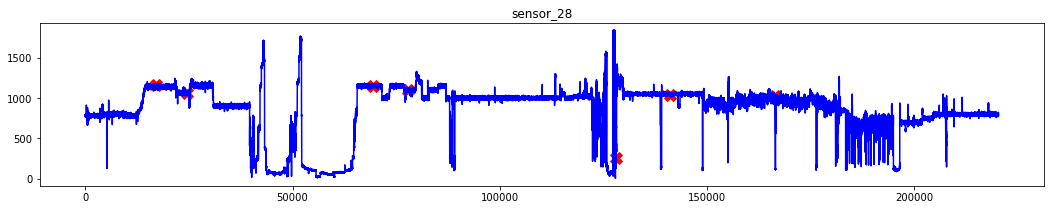

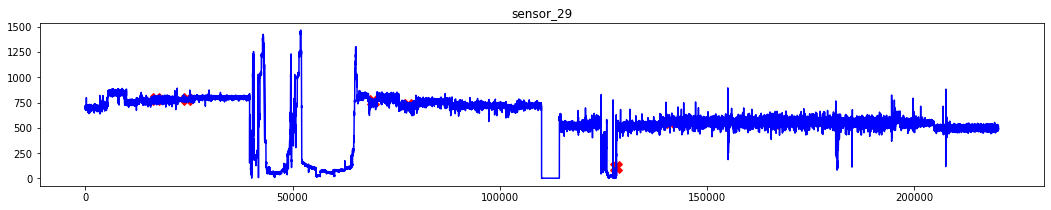

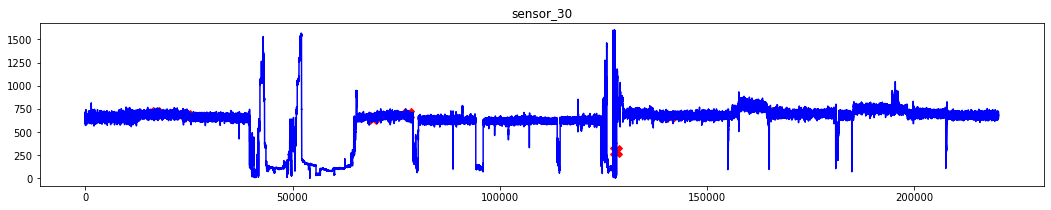

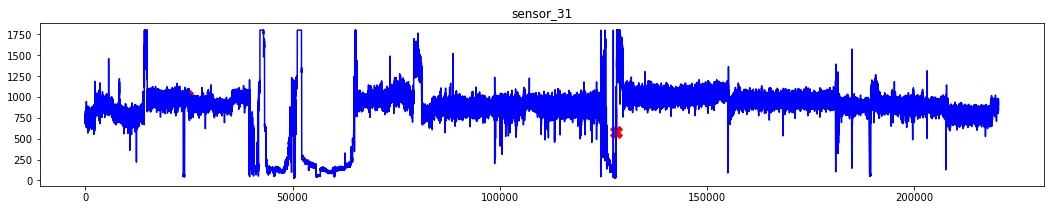

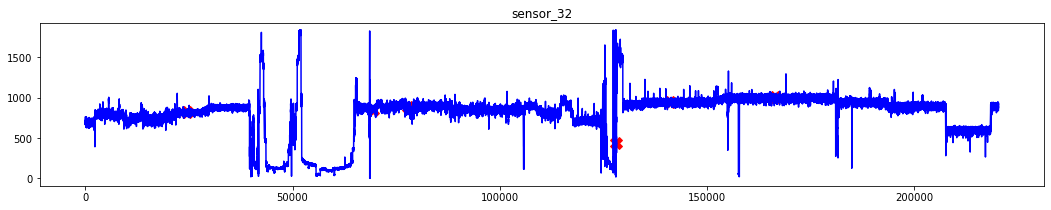

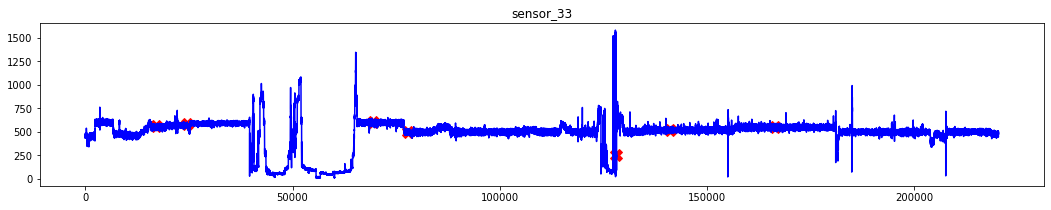

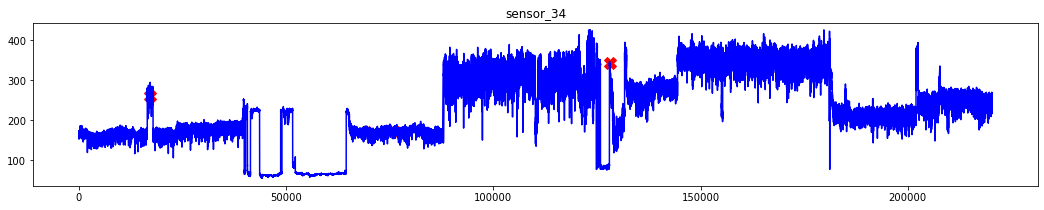

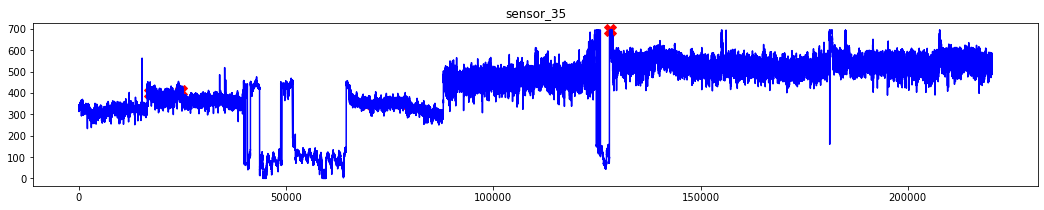

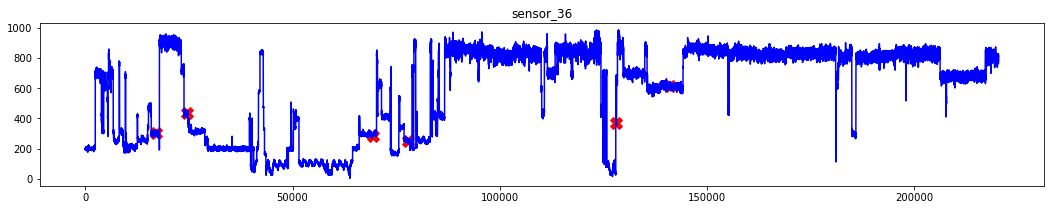

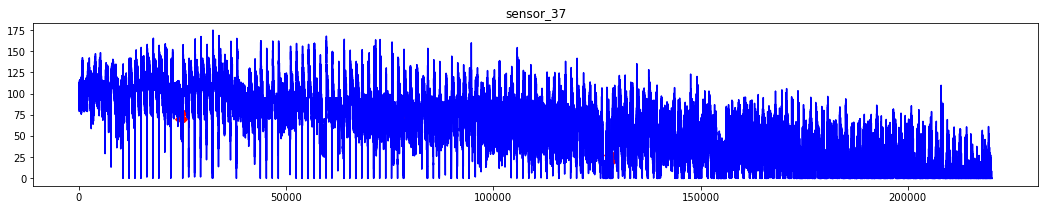

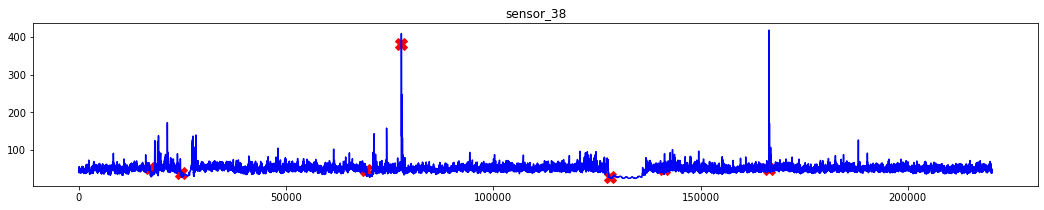

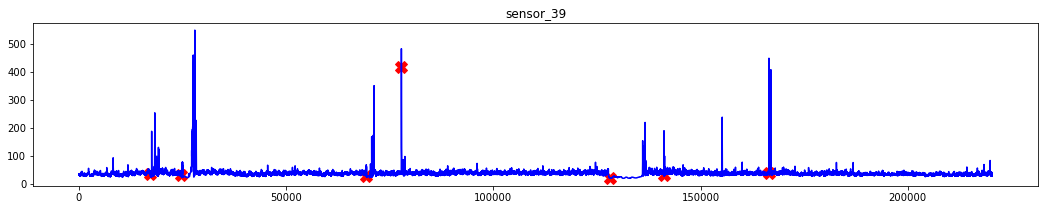

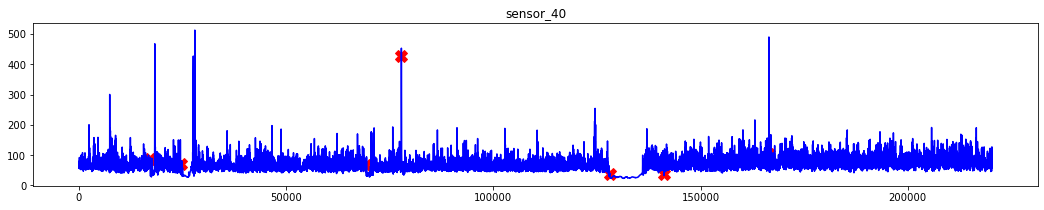

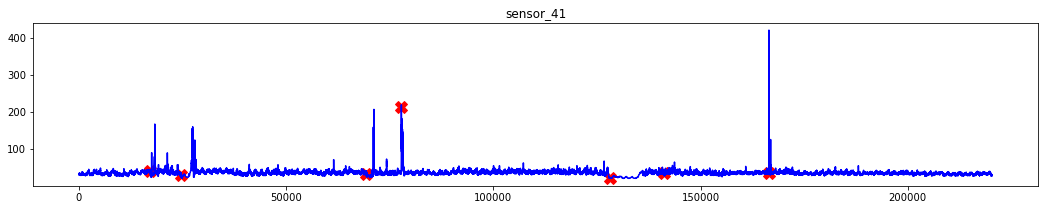

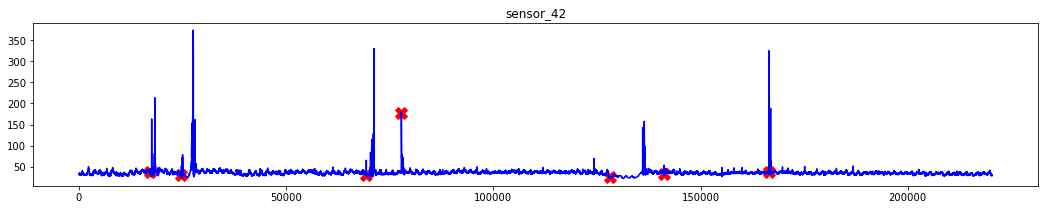

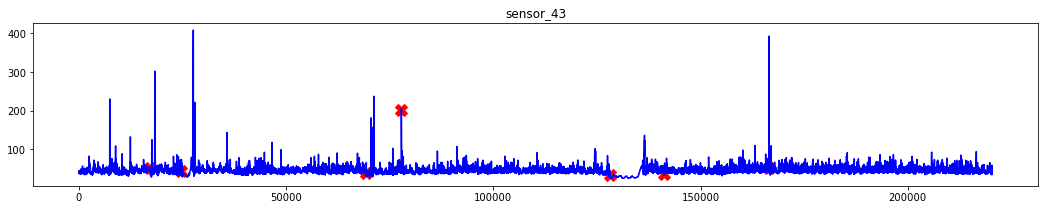

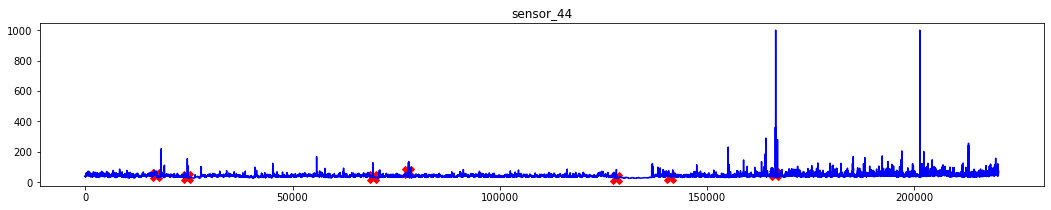

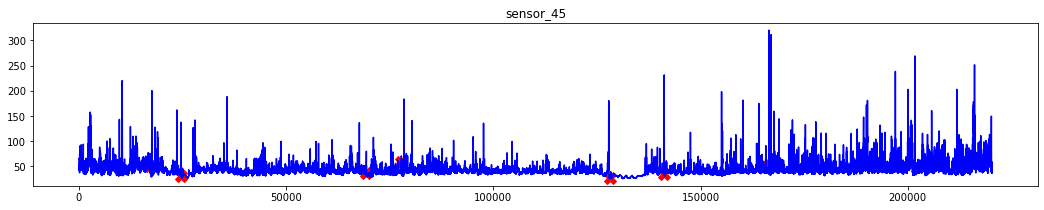

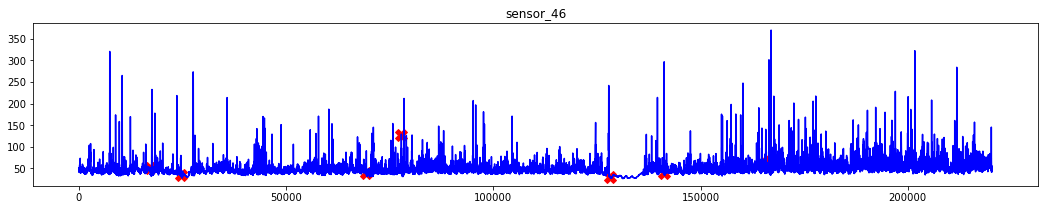

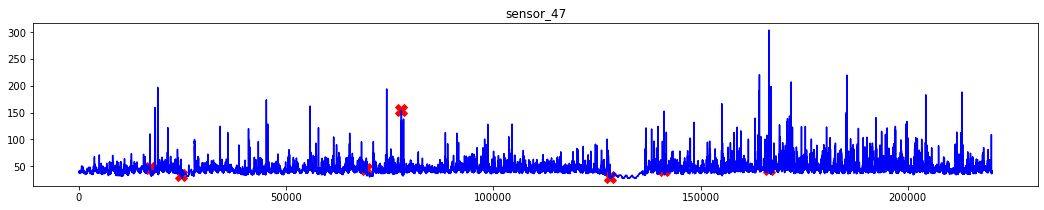

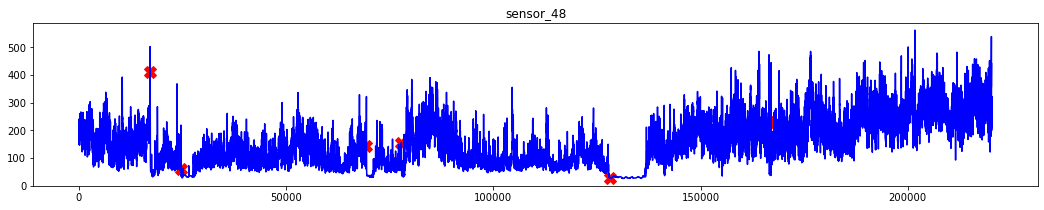

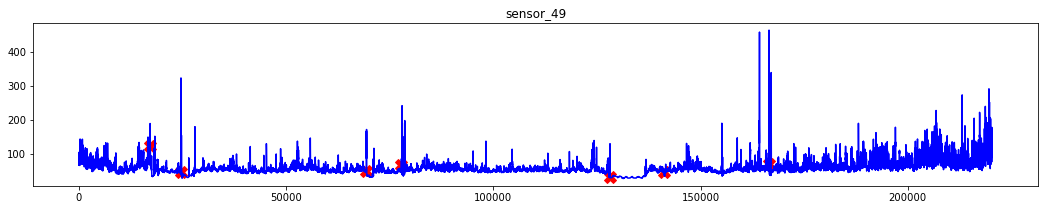

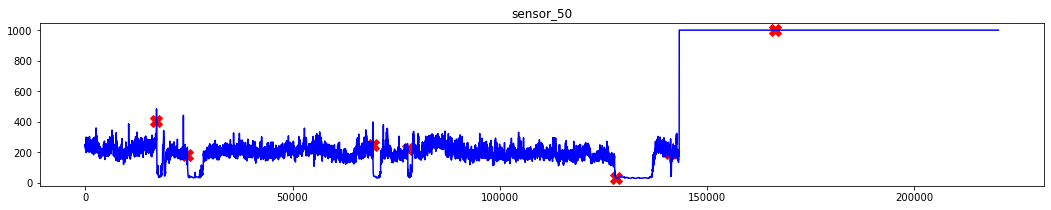

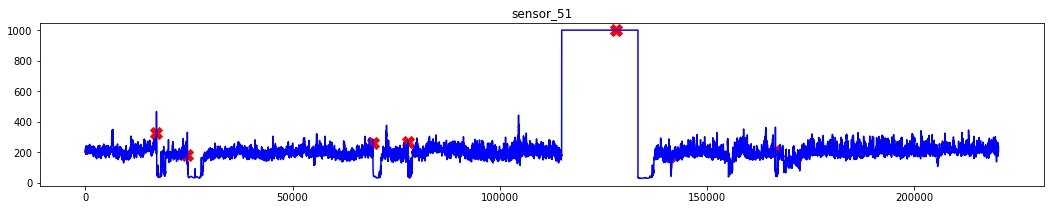

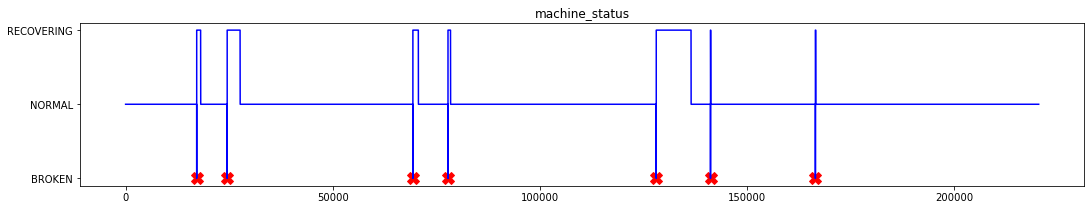

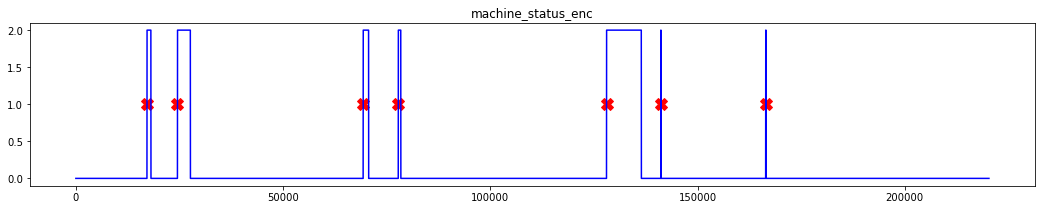

In [59]:
broken = df[df['machine_status']=='BROKEN']
names=df.columns
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(broken[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(df[name], color='blue')
    _ = plt.title(name)
    plt.show()

For time series plots, we'll reset the index to the "timestamp" column.

In [61]:
names = names.drop(['timestamp','machine_status','machine_status_enc'])
df.set_index(df['timestamp'])

timestamp  sensor_00  sensor_01  sensor_02  \
timestamp                                                                  
2018-04-01 00:00:00 2018-04-01 00:00:00   2.465394   47.09201  53.211800   
2018-04-01 00:01:00 2018-04-01 00:01:00   2.465394   47.09201  53.211800   
2018-04-01 00:02:00 2018-04-01 00:02:00   2.444734   47.35243  53.211800   
2018-04-01 00:03:00 2018-04-01 00:03:00   2.460474   47.09201  53.168400   
2018-04-01 00:04:00 2018-04-01 00:04:00   2.445718   47.13541  53.211800   
...                                 ...        ...        ...        ...   
2018-08-31 23:55:00 2018-08-31 23:55:00   2.407350   47.69965  50.520830   
2018-08-31 23:56:00 2018-08-31 23:56:00   2.400463   47.69965  50.564240   
2018-08-31 23:57:00 2018-08-31 23:57:00   2.396528   47.69965  50.520830   
2018-08-31 23:58:00 2018-08-31 23:58:00   2.406366   47.69965  50.520832   
2018-08-31 23:59:00 2018-08-31 23:59:00   2.396528   47.69965  50.520832   

                     sensor_03   sensor_04  sensor_05  sensor_06  sensor_07  \
timestamp                                                                     
2018-04-01 00:00:00  46.310760  634.375000   76.45975   13.41146   16.13136   
2018-04-01 00:01:00  46.310760  634.375000   76.45975   13.41146   16.13136   
2018-04-01 00:02:00  46.397570  638.888900   73.54598   13.32465   16.03733   
2018-04-01 00:03:00  46.397568  628.125000   76.98898   13.31742   16.24711   
2018-04-01 00:04:00  46.397568  636.458300   76.58897   13.35359   16.21094   
...                        ...         ...        ...        ...        ...   
2018-08-31 23:55:00  43.142361  634.722229   64.59095   15.11863   16.65220   
2018-08-31 23:56:00  43.142361  630.902771   65.83363   15.15480   16.70284   
2018-08-31 23:57:00  43.142361  625.925903   67.29445   15.08970   16.70284   
2018-08-31 23:58:00  43.142361  635.648100   65.09175   15.11863   16.56539   
2018-08-31 23:59:00  43.142361  639.814800   65.45634   15.11863   16.65220   

                     sensor_08  ...  sensor_44  sensor_45  sensor_46  \
timestamp                       ...                                    
2018-04-01 00:00:00   15.56713  ...  39.641200   65.68287   50.92593   
2018-04-01 00:01:00   15.56713  ...  39.641200   65.68287   50.92593   
2018-04-01 00:02:00   15.61777  ...  39.351852   65.39352   51.21528   
2018-04-01 00:03:00   15.69734  ...  39.062500   64.81481   51.21528   
2018-04-01 00:04:00   15.69734  ...  38.773150   65.10416   51.79398   
...                        ...  ...        ...        ...        ...   
2018-08-31 23:55:00   15.65393  ...  68.287030   52.37268   48.32176   
2018-08-31 23:56:00   15.65393  ...  66.840280   50.63657   48.03241   
2018-08-31 23:57:00   15.69734  ...  65.393520   48.90046   48.03241   
2018-08-31 23:58:00   15.74074  ...  64.236110   47.74306   48.32176   
2018-08-31 23:59:00   15.65393  ...  62.789350   46.29630   48.90046   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
timestamp                                                                    
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00  41.087960   212.3843  153.64580  1000.0000   231.1921   
2018-08-31 23:56:00  40.798610   213.8310  156.25000  1000.0000   231.1921   
2018-08-31 23:57:00  40.798610   217.3032  155.38190  1000.0000   232.0602   
2018-08-31 23:58:00  40.509258   222.5116  153.93520  1000.0000   234.0856   
2018-08-31 23:59:00  40.219910   227.4306  150.46300  1000.0000   234.0856   

                     machine_status  machine_status_enc  
tim

Plot time series for each sensor with its mean and standard deviation

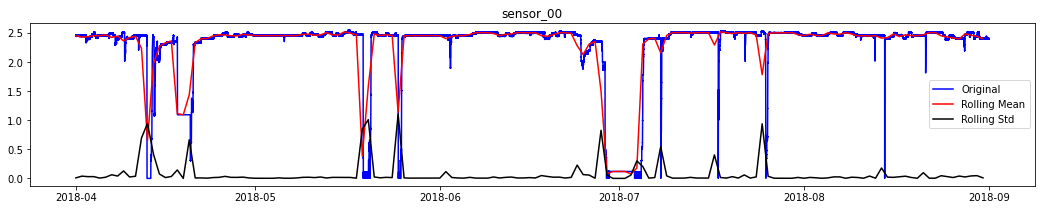

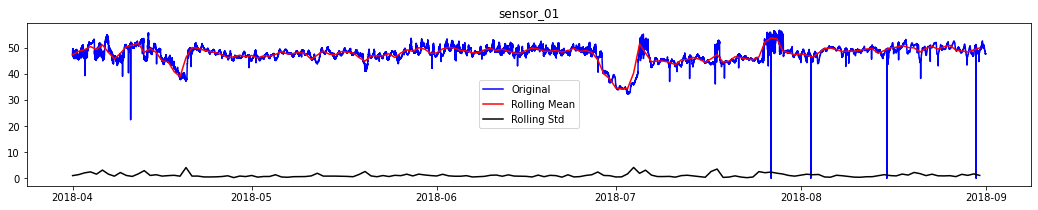

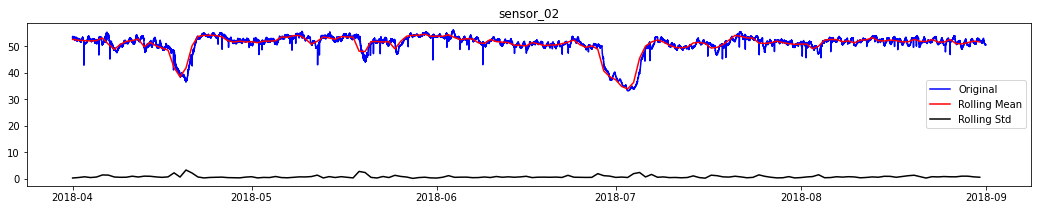

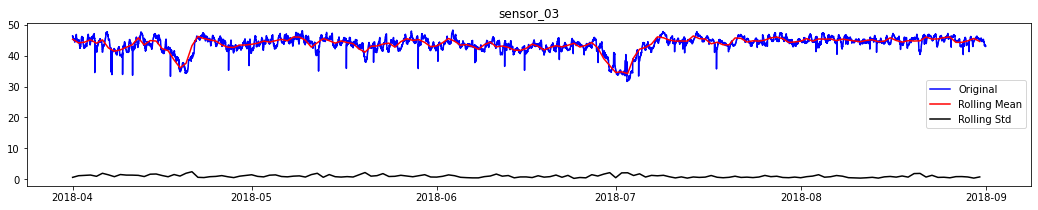

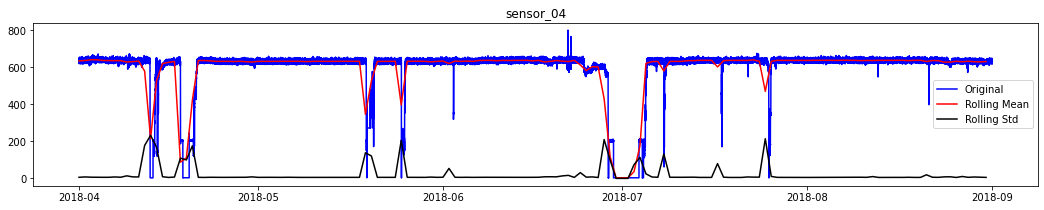

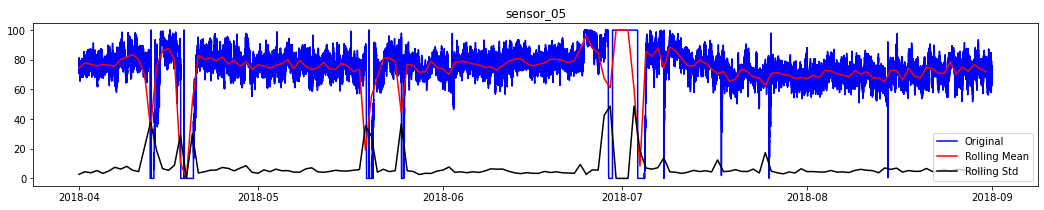

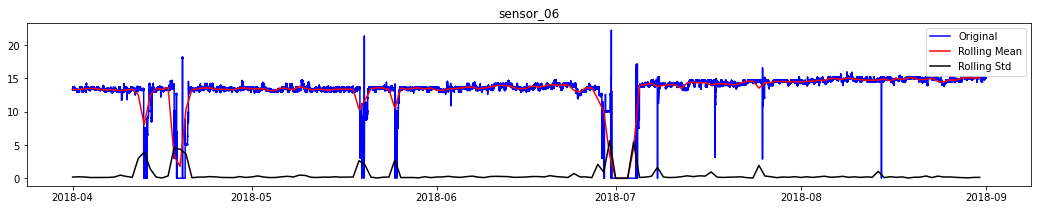

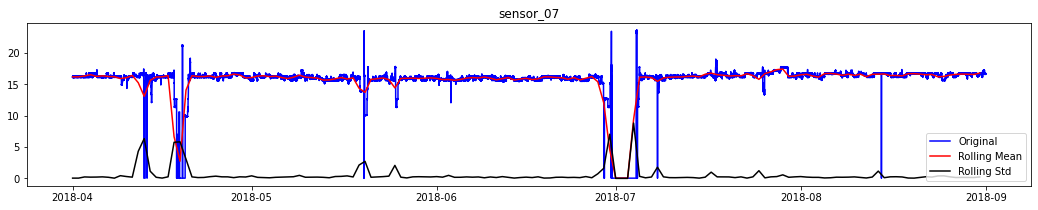

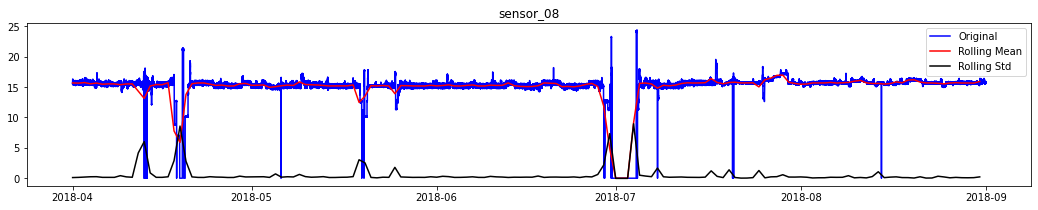

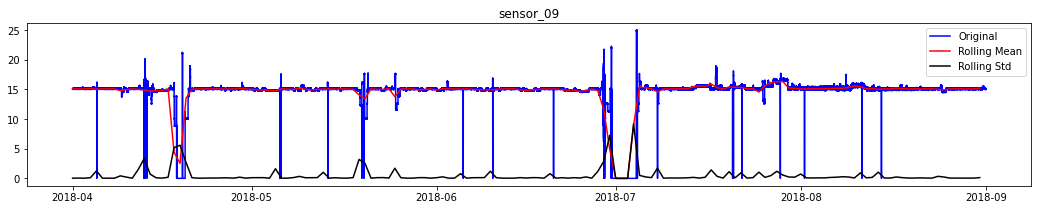

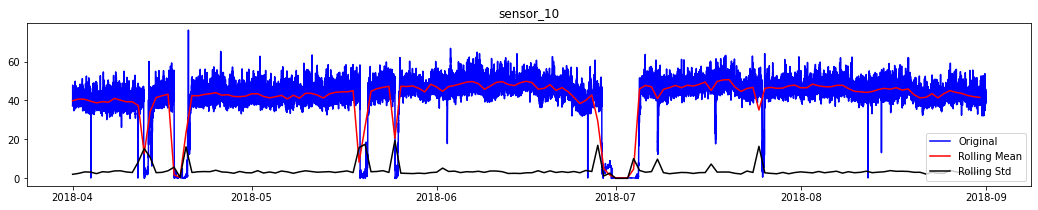

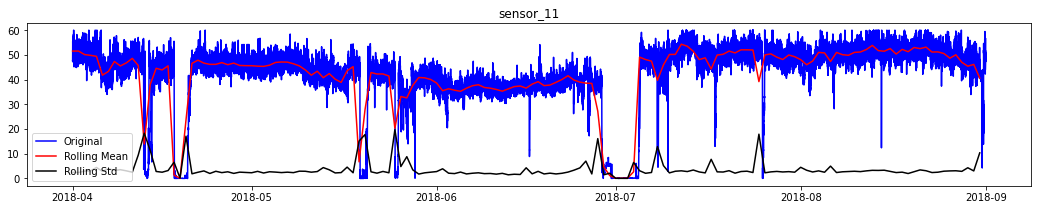

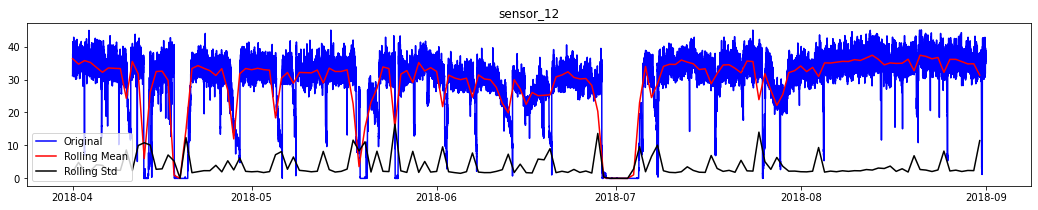

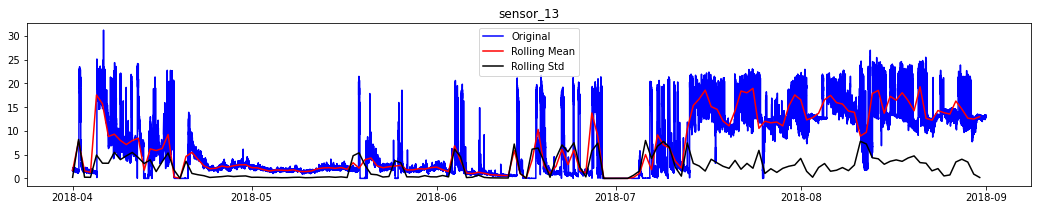

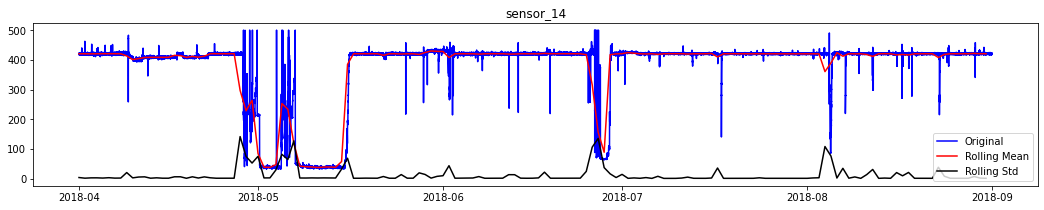

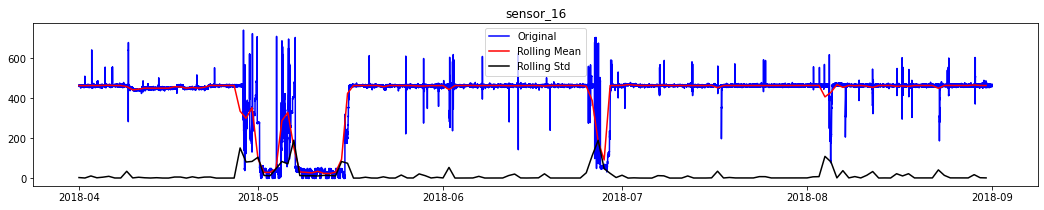

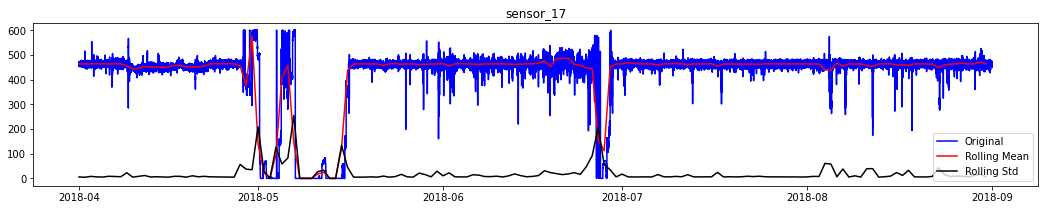

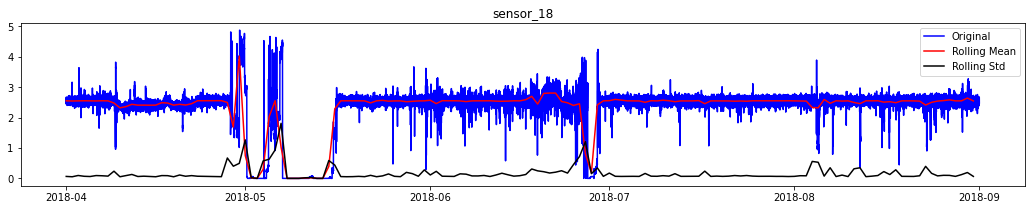

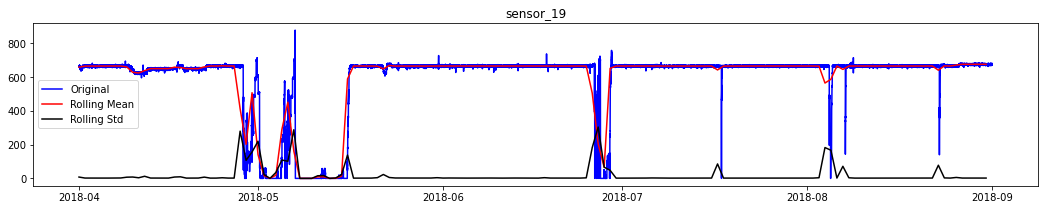

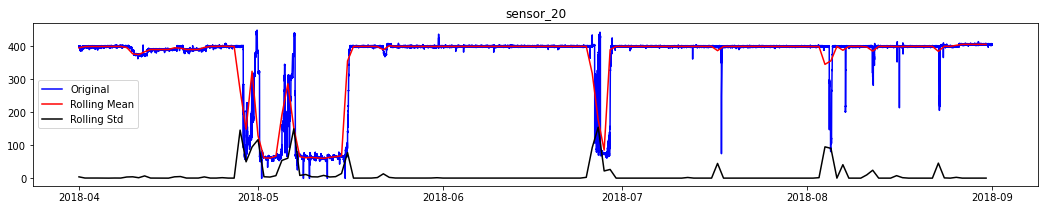

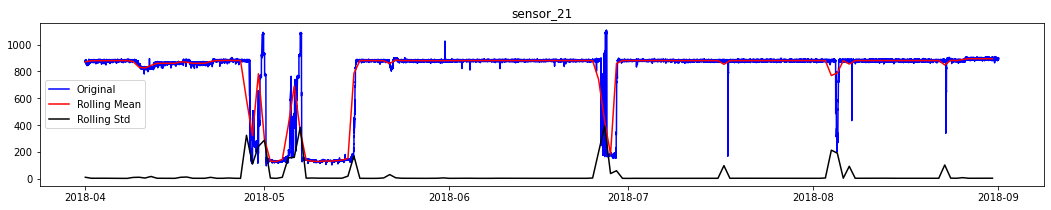

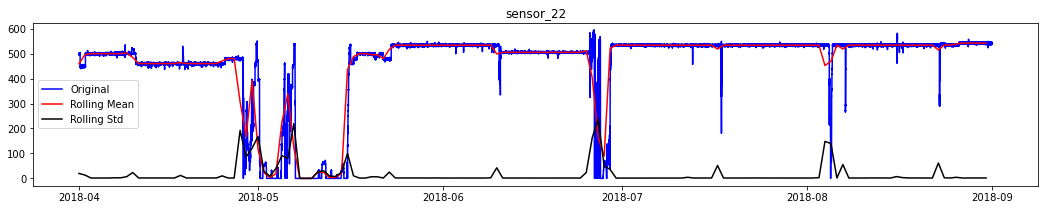

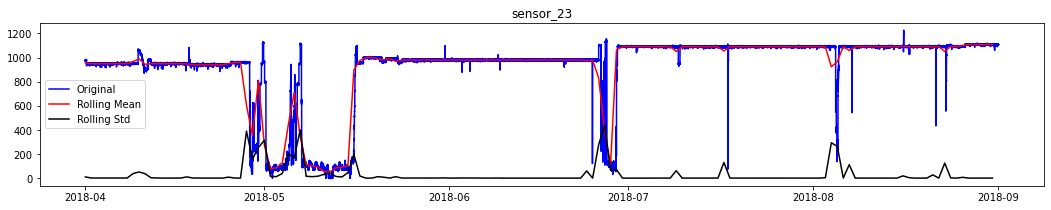

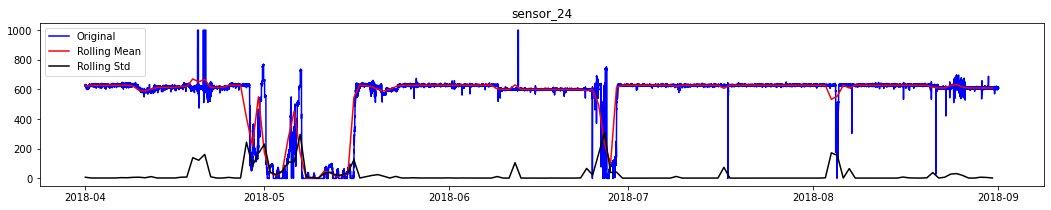

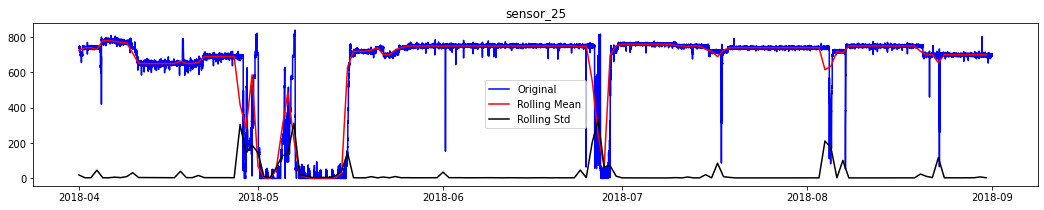

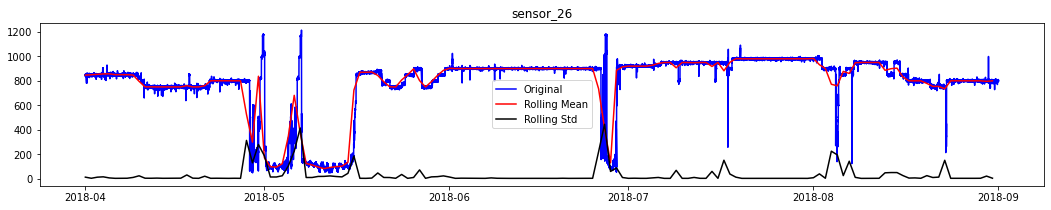

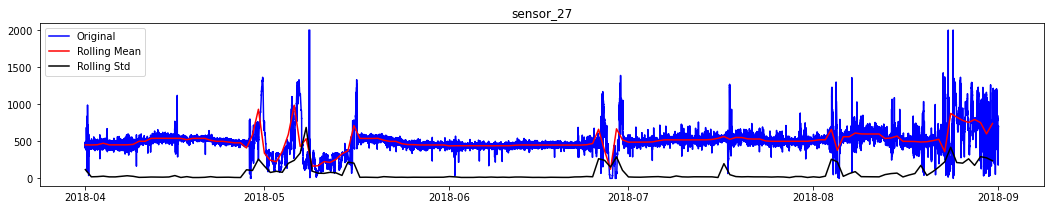

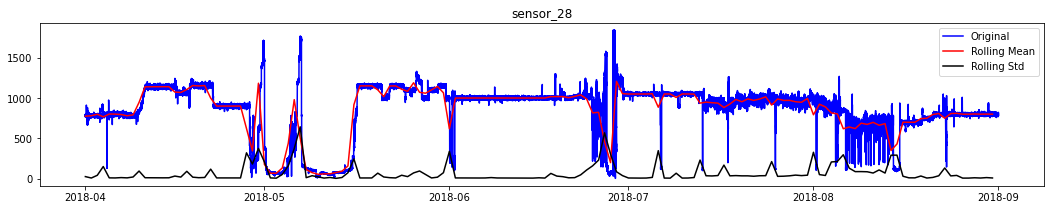

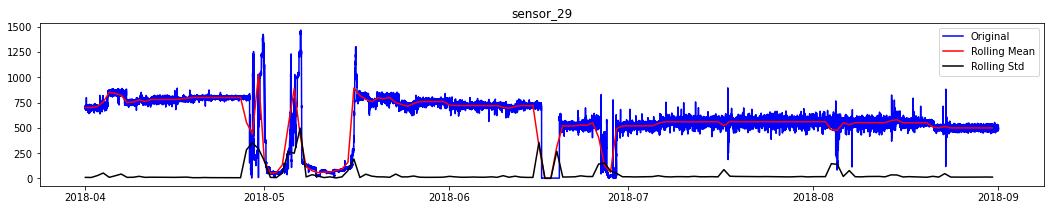

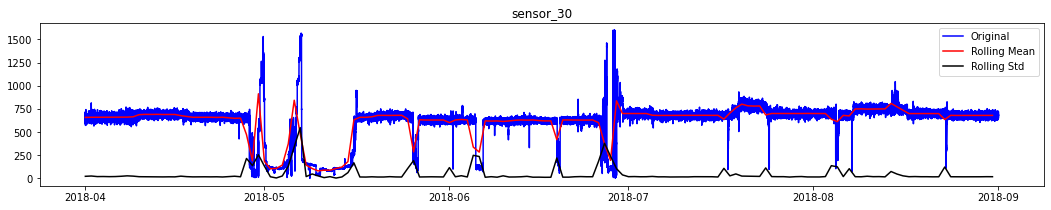

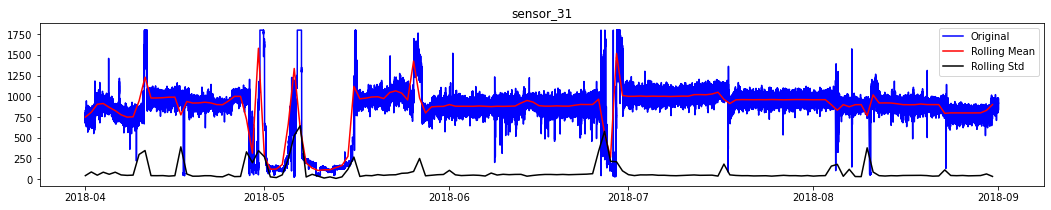

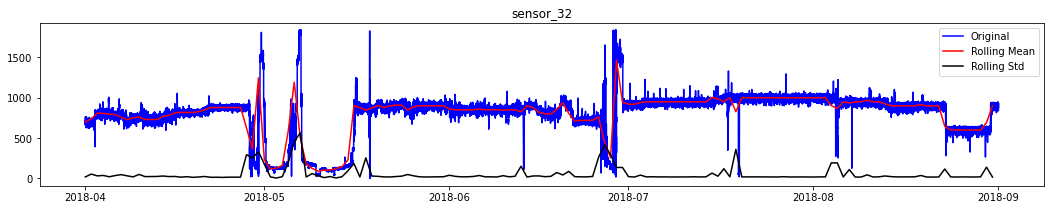

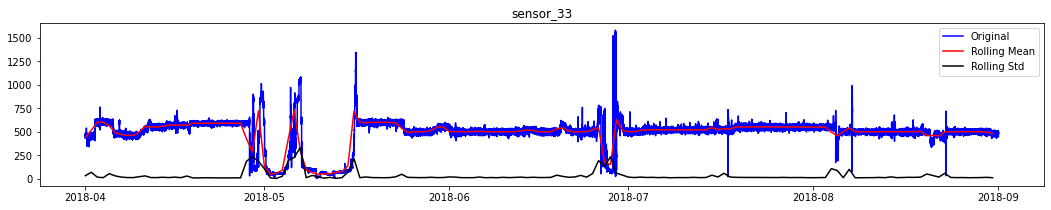

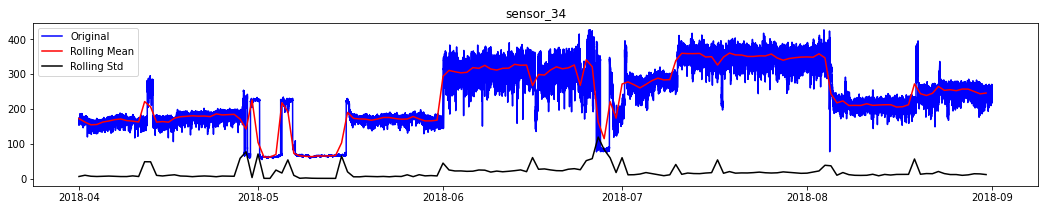

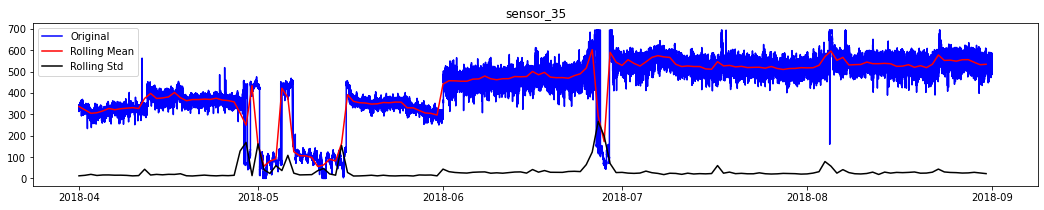

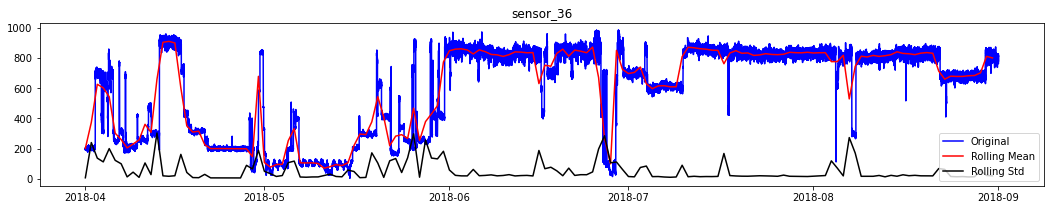

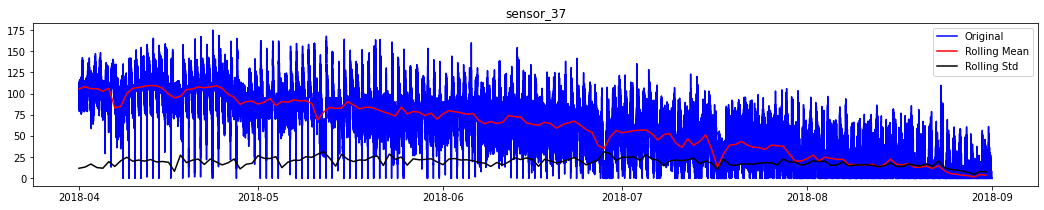

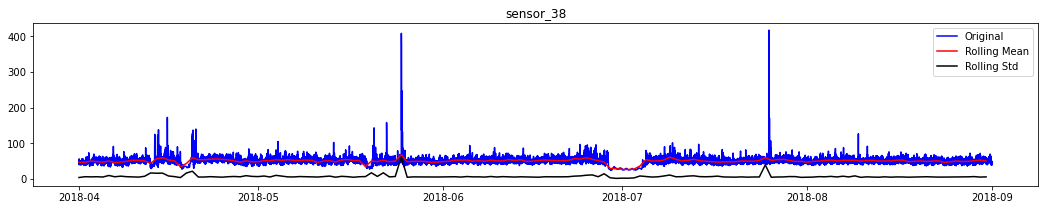

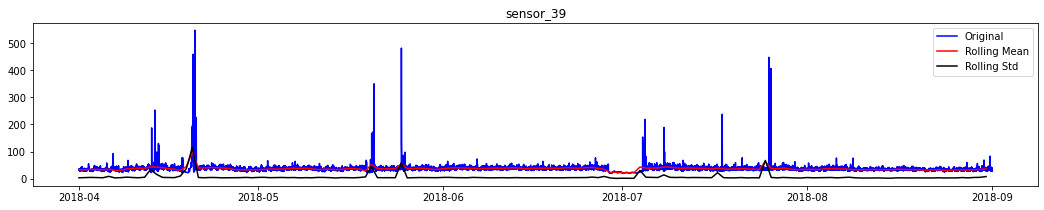

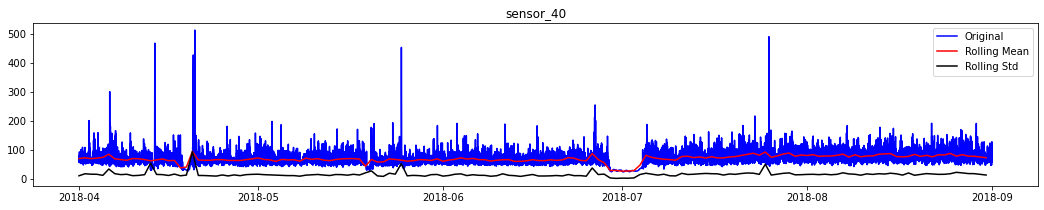

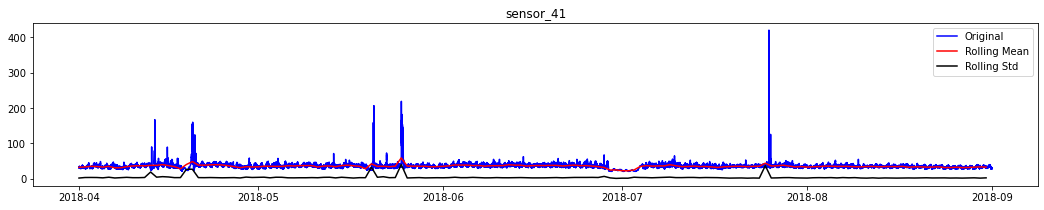

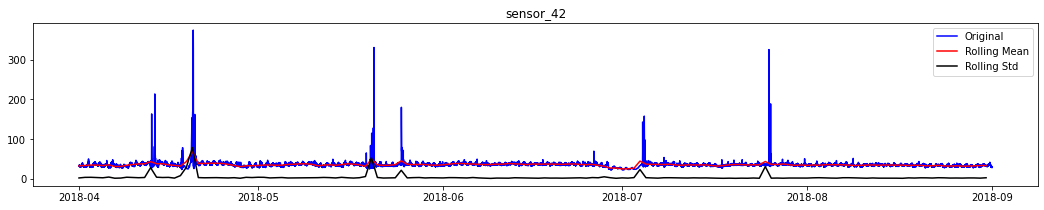

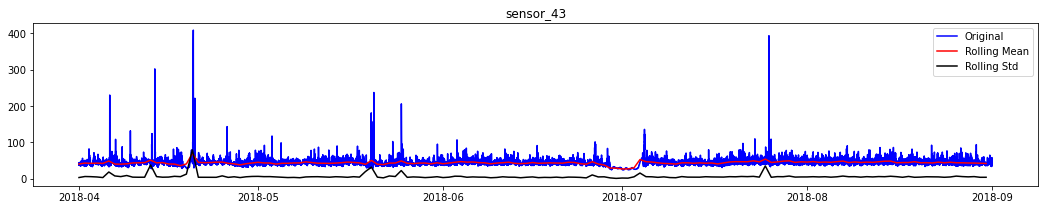

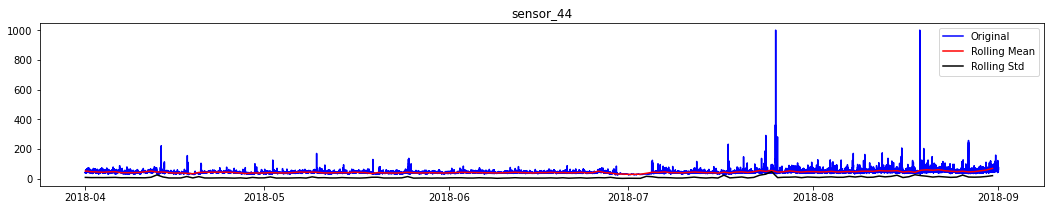

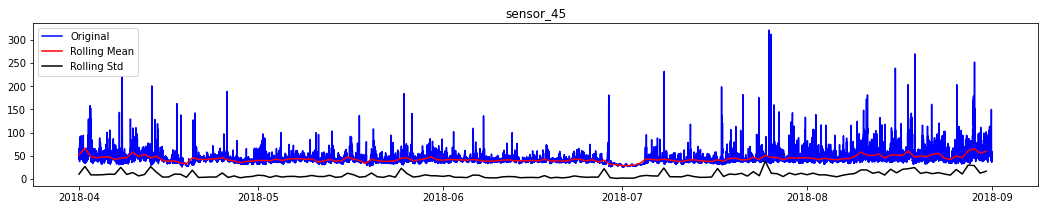

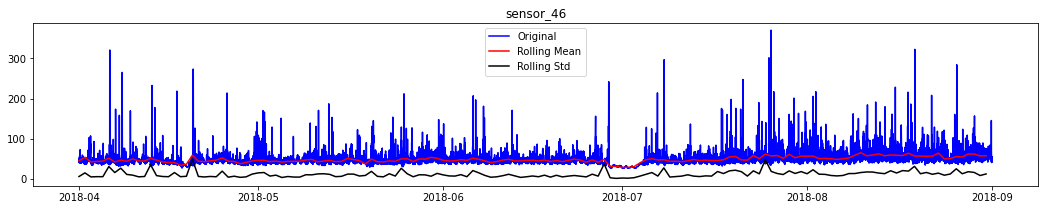

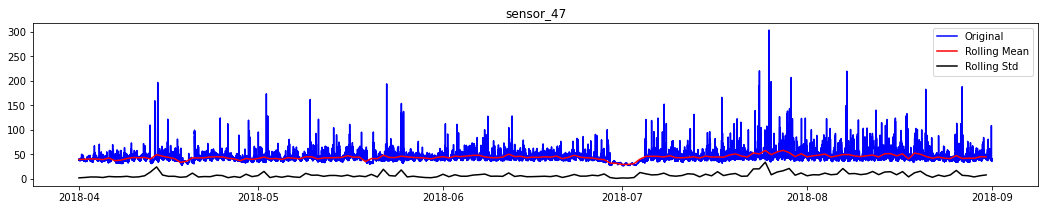

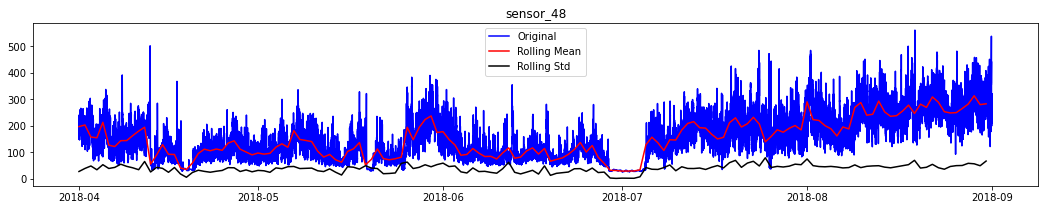

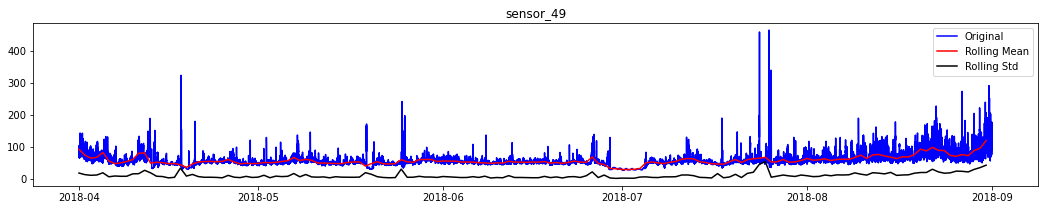

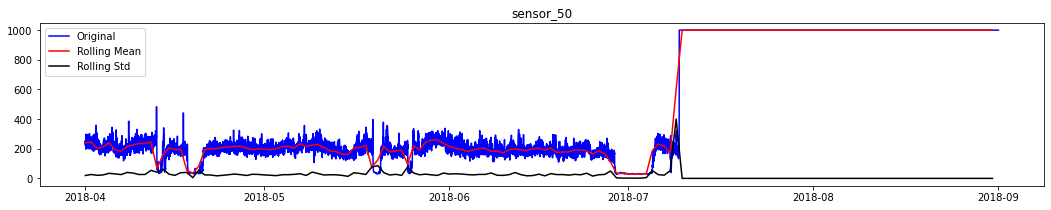

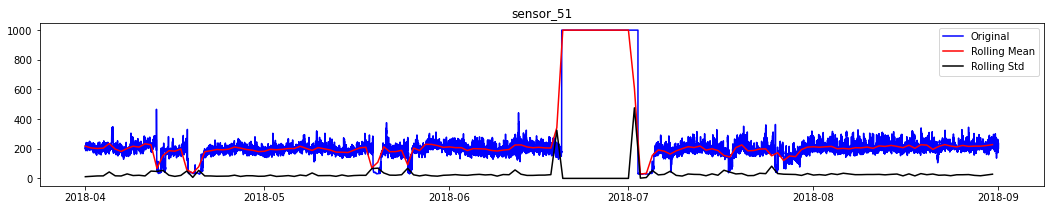

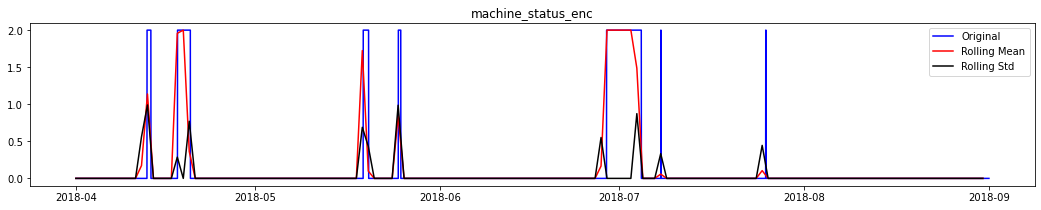

In [19]:
rollmean = df.resample(rule='D').mean()
rollstd = df.resample(rule='D').std()
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

Now, we'll use the anomaly detection function.

In [20]:
from data_describe.anomaly.detection import anomaly_detection

In [35]:
df.reset_index(drop=True, inplace=True)

In [36]:
df.head()

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
0 2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
1 2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2 2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
3 2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
4 2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

   sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor_44  sensor_45  \
0   76.45975   13.41146   16.13136   15.56713  ...  39.641200   65.68287   
1   76.45975   13.41146   16.13136   15.56713  ...  39.641200   65.68287   
2   73.54598   13.32465   16.03733   15.61777  ...  39.351852   65.39352   
3   76.98898   13.31742   16.24711   15.69734  ...  39.062500   64.81481   
4   76.58897   13.35359   16.21094   15.69734  ...  38.773150   65.10416   

   sensor_46  sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
0   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889   
1   50.92593  38.194440   157.9861   67.70834   243.0556   201.3889   
2   51.21528  38.194443   155.9606   67.12963   241.3194   203.7037   
3   51.21528  38.194440   155.9606   66.84028   240.4514   203.1250   
4   51.79398  38.773150   158.2755   66.55093   242.1875   201.3889   

   machine_status  machine_status_enc  
0          NORMAL                   0  
1          NORMAL                   0  
2          NORMAL                   0  
3          NORMAL                   0  
4          NORMAL                   0  

[5 rows x 54 columns]

We will take a subset of the data for faster runtime, but we want to select a slice where the pump is broken at least once.

In [39]:
df.loc[df['machine_status_enc'] == 1]

timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17155  2018-04-12 21:55:00   0.000000  53.342010  52.821180  43.402775   
24510  2018-04-18 00:30:00   1.093982  42.534720  47.699650  41.449650   
69318  2018-05-19 03:18:00   2.258796  47.265630  52.734370  43.446178   
77790  2018-05-25 00:30:00   2.321759  47.482640  51.475693  42.795135   
128040 2018-06-28 22:00:00   0.364005  40.190970  45.225690  40.190971   
141131 2018-07-08 00:11:00   0.001968  45.138890  52.907990  45.355900   
166440 2018-07-25 14:00:00   2.318808  45.833332  52.994790  43.880210   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
17155   202.526031   49.79289   3.219039  16.890910  16.869210  ...   
24510   206.038757   60.30106  12.304690  15.154800  14.185470  ...   
69318   200.115738   66.14643  13.592300  15.914350  15.147570  ...   
77790   612.152800   67.30158  14.062500  16.608800  15.943290  ...   
128040  201.368622    0.00000  11.335360  15.270540  15.183740  ...   
141131  500.000000    1.40131   0.028935   0.036169   0.036169  ...   
166440  420.503448   72.52040  14.185470  16.247110  15.697340  ...   

        sensor_44  sensor_45   sensor_46   sensor_47   sensor_48   sensor_49  \
17155    50.92593  51.215280   50.636570   46.006940  409.143500  121.527800   
24510    34.72222  31.539350   34.432870   33.275460   59.895830   44.560180   
69318    35.01157  37.905090   39.062500   45.428240  144.675900   49.768520   
77790    65.68287  57.870370  127.893500  153.935200  155.381900   65.682870   
128040   28.06713  28.067129   29.513889   29.224537   29.224537   29.513889   
141131   37.32639  35.300930   38.194440   43.402780   99.537030   44.849540   
166440   52.10200  52.662040   67.129630   43.981480  230.324100   69.733800   

          sensor_50  sensor_51  machine_status  machine_status_enc  
17155    401.909700   324.6528          BROKEN                   1  
24510    177.662000   183.7384          BROKEN                   1  
69318    246.238400   257.5231          BROKEN                   1  
77790    220.196800   267.3611          BROKEN                   1  
128040    32.407406  1000.0000          BROKEN                   1  
141131   192.129600   174.7685          BROKEN                   1  
166440  1000.000000   205.7292          BROKEN                   1  

[7 rows x 54 columns]

In [45]:
df_subset = df[17000:18000]
df_subset['sensor_00']

17000    2.459491
17001    2.448669
17002    2.456539
17003    2.453588
17004    2.453588
           ...   
17995    0.000000
17996    0.000000
17997    0.000000
17998    0.000000
17999    0.000000
Name: sensor_00, Length: 1000, dtype: float64

In [46]:
#Runtime is too long.
widget = anomaly_detection(df_subset, target="sensor_00",
                  date_col="index", n_periods=7, time_split_index=20, 
                           sigma=3.5)

In [47]:
#date_col='index'
widget.show(viz_backend='plotly')

In [29]:
#date_col='timestamp'
widget.show(viz_backend='plotly')

/Users/rena.haswah/Desktop/data-describe/data_describe/compat/_notebook.py:30: JupyterPlotlyWarning:

Are you running in Jupyter Lab? The extension "jupyterlab-plotly" was not found and is required for Plotly visualizations in Jupyter Lab.

